### JURNAL MODUl 4

Soal Nomor 1:

Lakukan Rekonstruksi Wavelet terhadap citra pada folder assets

In [1]:
import cv2 as cv 
import matplotlib.pyplot as plt 
import numpy as np 

Code di atas digunakan untuk

memanggil library cv2 dengan nama alias cv. Library ini digunakan untuk melakukan operasi dasar matriks 

memanggil fungsi pyplot library matplotlib dengan nama alias plt. Library ini digunakan untuk membaca gambar

memanggil library numpy dengan nama alias np. Library ini digunakan untuk membuat matriks

In [2]:
LL = plt.imread("LL.jpg")
LL = cv.cvtColor(LL,cv.COLOR_BGR2GRAY)
LH = plt.imread("LH.jpg")
LH = cv.cvtColor(LH,cv.COLOR_BGR2GRAY)
HL = plt.imread("HL.jpg")
HL = cv.cvtColor(HL,cv.COLOR_BGR2GRAY)
HH = plt.imread("HH.jpg")
HH = cv.cvtColor(HH,cv.COLOR_BGR2GRAY)

Code di atas digunakan untuk membaca citra yang akan direkontruksi dengan fungsi imread() pada library matplotlib.pyplot

Text(0.5, 1.0, 'HH')

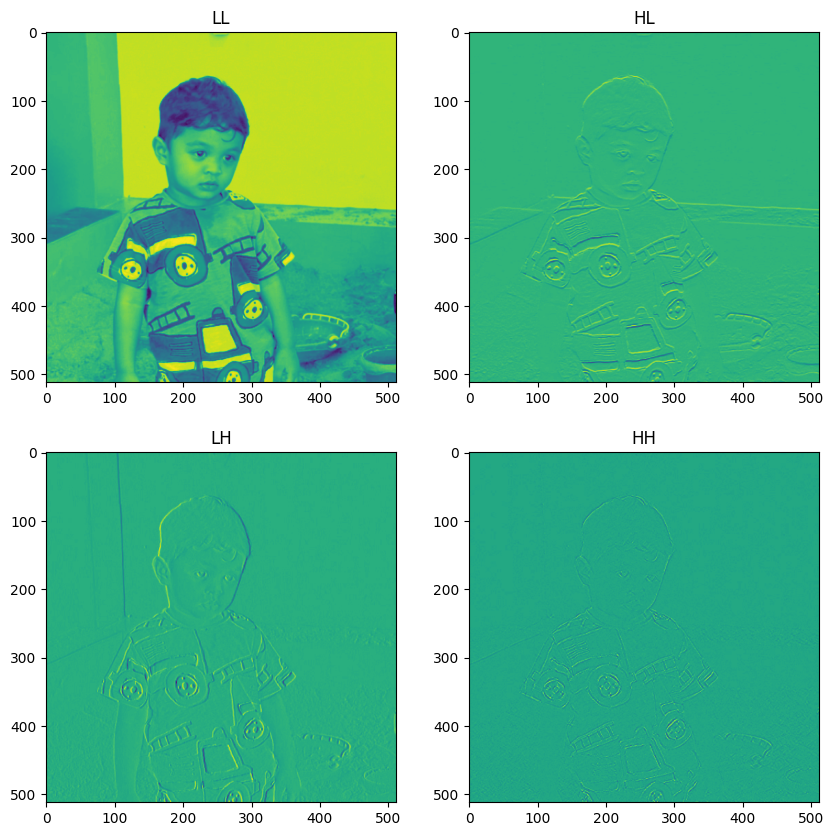

In [23]:
plt.figure(figsize=[10,10]) #merupakan method yang berfungsi memberi ukuran pada suatu dimensi

plt.subplot(2, 2, 1) 
plt.imshow(LL) 
plt.title('LL')
plt.subplot(2, 2, 2) 
plt.imshow(HL) 
plt.title('HL')
plt.subplot(2, 2, 3) 
plt.imshow(LH) 
plt.title('LH')
plt.subplot(2, 2, 4) 
plt.imshow(HH) 
plt.title('HH')

Code di atas digunakan untuk menampilkan 4 citra yang akan direkontruksi

Text(0.5, 1.0, 'HH')

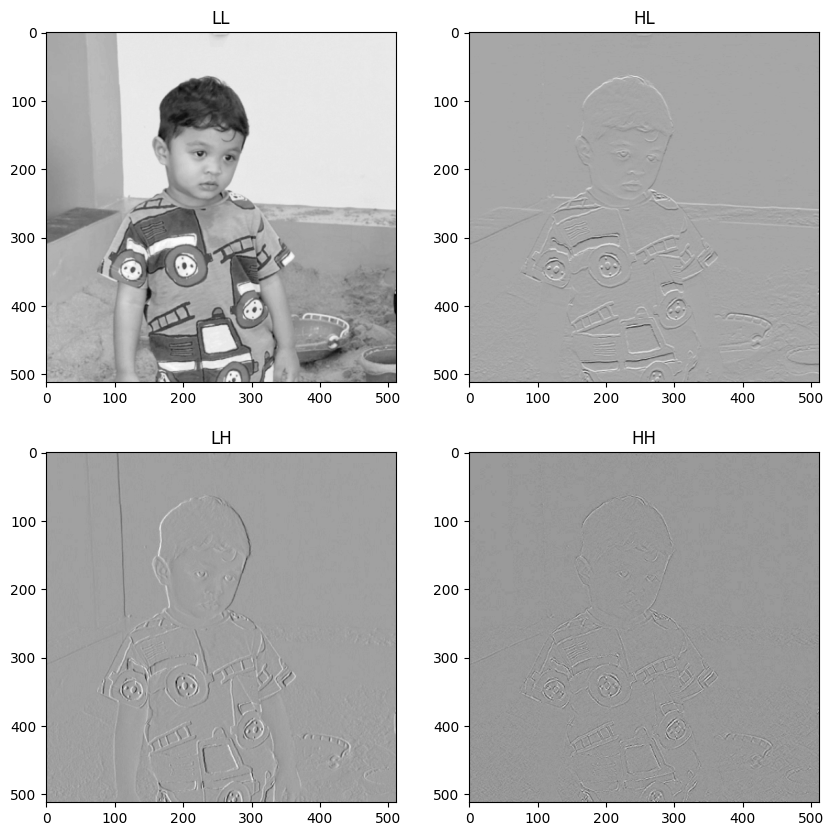

In [24]:
plt.figure(figsize=[10,10]) #merupakan method yang berfungsi memberi ukuran pada suatu dimensi

plt.subplot(2, 2, 1) 
plt.imshow(LL, cmap='gray') 
plt.title('LL')
plt.subplot(2, 2, 2) 
plt.imshow(HL, cmap='gray') 
plt.title('HL')
plt.subplot(2, 2, 3) 
plt.imshow(LH, cmap='gray') 
plt.title('LH')
plt.subplot(2, 2, 4) 
plt.imshow(HH, cmap='gray') 
plt.title('HH')


Code di atas digunakan untuk menampilkan 4 gambar yang sudah dibaca pada code sebelumnya yaitu gambar LL, LH, HL, dan HH

In [5]:
#method rekonstruksi
def rekonstruksi(LL, LH, HL, HH):
    tinggi_img, lebar_img = LL.shape 
    t = tinggi_img*2; l = lebar_img*2 
    image = np.zeros([t,l]) 
    LL2, LH2 = np.zeros([t,l]), np.zeros([t,l]) 
    HL2, HH2 = np.zeros([t,l]), np.zeros([t,l]) 
    #memberikan ruang kosong pada matrix
    for i in range(0,t,2):
        for j in range(0,l,2):
            LL2[i][j] = LL[int(i/2)][int(j/2)]
            LH2[i][j] = LH[int(i/2)][int(j/2)]
            HL2[i][j] = HL[int(i/2)][int(j/2)]
            HH2[i][j] = HH[int(i/2)][int(j/2)]
    
    #mengisi baris yang kosong pada matrix citra
    for i in range(1,t,2):
        for j in range(l):
            LL2[i][j]  = LL2[i-1][j]
            LH2[i][j] -= LH2[i-1][j]
            HL2[i][j]  = HL2[i-1][j]
            HH2[i][j] -= HH2[i-1][j]
    #mengisi kolom yang kosong pada matrix citra
    for i in range(t):
        for j in range(1,l,2):
            LL2[i][j]  = LL2[i][j-1]
            LH2[i][j]  = LH2[i][j-1]
            HL2[i][j] -= HL2[i][j-1]
            HH2[i][j] -= HH2[i][j-1]
    
    #penggabungan LL, LH, HL, HH ke dalam satu matrix citra
    for i in range(t):
        for j in range(l):
            image[i][j] += (LL2[i][j]+LH2[i][j]+HL2[i][j]+HH2[i][j])
    return image #berfungsi untuk mengembalikan nilai berupa gambar

Code di atas digunakan untuk:

Membuat Method Rekontruksi dengan parameter 4 citra yang telah disediakan pada soal. fungsi method ini digunakan untuk merekonstruksi citra asli dari koefisien-koefisien hasil penguraian citra menggunakan rekonstruksi wavelet.
Setelah matriks LL, LH, HL, dan HH terisi dengan nilai koefisien, nilai-nilai tersebut akan digunakan untuk merekonstruksi citra asli dengan melakukan proses inversi DWT pada setiap sub-band.

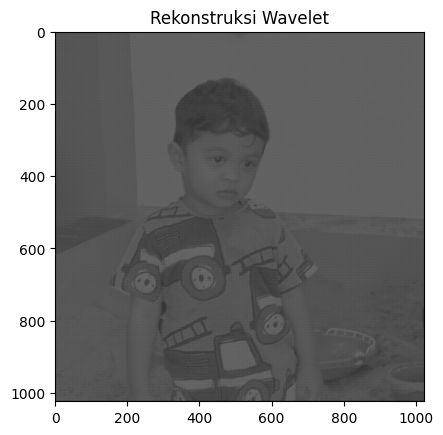

In [6]:
hasil_R = rekonstruksi (LL, LH, HL, HH)
plt.title("Rekonstruksi Wavelet")
plt.imshow(hasil_R, cmap='gray')

Code di atas digunakan untuk memanggil fungsi rekontruksi dan memasukkan value dari pemanggilan ke dalam variabel hasil_r. lalu menampilkannya ke dalam warna gray.

## kernel x:

low pass filter = [0.7, 0.7]
high pass filter = [-0.7, 0.7]

In [7]:
low_pass_filter = np.array([0.7, 0.7])
high_pass_filter = np.array([-0.7, 0.7])
image_D = np.array (hasil_R [:,:]) 

Code di atas digunakan untuk membuat variabel yang akan diisi oleh matriks dari kernel x dan variabel array yang akan menyimpan nilai dekomposisinya (atau pembagian nilai).

Soal Nomor 2:

Lakukan Dekomposisi Wavelet Level 1 pada citra hasil rekonstruksi menggunakan kernel x.

In [8]:
#fungsi row_padding berfungsi untuk menambahkan padding 0 sebanyak n pada bagian baris dari citra aslinya, dengan cara setiap n didapatkan dari panjang kernel dikurangi 1, kemudian dilakukan penambahan padding dengan fungsi pad pada numpy lalu menyimpan dan mengembalikan kembali citra hasil padding pada variabel result
def row_padding (img, n):
    n = len(n)-1
    result = np.pad (img, ([0,0],[0,n]))
    return result

Code di atas merupakan sebuah fungsi yang digunakan untuk melakukan padding atau penambahan piksel pada setiap baris citra. Fungsi row_padding() menerima dua parameter, yaitu img dan n. Parameter img merupakan citra yang akan dilakukan padding, sedangkan n adalah jumlah piksel yang ingin ditambahkan pada setiap baris citra.

In [9]:
#fungsi column_padding berfungsi untuk menambahkan padding 0 sebanyak n pada bagian kolom dari citra aslinya, dengan cara setiap n didapatkan dari panjang kernel dikurangi 1, kemudian dilakukan penambahan padding dengan fungsi pad pada numpy lalu menyimpan dan mengembalikan kembali citra hasil padding pada variabel result
def column_padding (img, n):
    n = len(n)-1
    result = np.pad (img, ([0,n],[0,0]))
    return result

Code di atas merupakan sebuah fungsi yang digunakan untuk melakukan padding atau penambahan piksel pada setiap kolom citra. Fungsi column_padding() menerima dua parameter, yaitu img dan n. Parameter img merupakan citra yang akan dilakukan padding, sedangkan n adalah jumlah piksel yang ingin ditambahkan pada setiap kolom citra.

In [10]:
#fungsi row_convolution berfungsi untuk melakukan konvolusi pada citra hasil padding dengan kernel atau filter, 2 perulangan awal digunakan untuk mengakses tiap indeks atau pixel yang berada pada citra hasil padding, kemudian perulangan yang berada di dalamnya digunakan sebagai konvolusi yang nantinya hasil konvolusi tiap indeksnya akan tersimpan dan dikembalikan pada variabel result
def row_convolution(pad, kernel, img):
    result = np.zeros(img.shape)
    for i in range (img.shape[0]):
        for j in range(img.shape[1]):
            
            for k in range(len(kernel)):
                result[i][j] += (kernel[k]*pad[i,j+k])
    return result

Code di atas merupakan sebuah fungsi untuk melakukan konvolusi pada sebuah citra pada setiap baris citra dengan menggunakan kernel tertentu. Fungsi ini memiliki tiga parameter masukan, yaitu pad yang merupakan citra hasil padding pada setiap baris citra, kernel yang merupakan kernel yang digunakan untuk konvolusi pada setiap baris citra, dan img yang merupakan citra asli yang akan diolah.

In [11]:
#fungsi column_convolution berfungsi untuk melakukan konvolusi pada citra hasil padding dengan kernel atau filter, 2 perulangan awal digunakan untuk mengakses tiap indeks atau pixel yang berada pada citra hasil padding, kemudian perulangan yang berada di dalamnya digunakan sebagai konvolusi yang nantinya hasil konvolusi tiap indeksnya akan tersimpan dan dikembalikan pada variabel result
def column_convolution(pad, kernel, img):
    result = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            
            for k in range(len(kernel)):
                result[i][j] += (kernel[k]*pad[i+k,j])
    return result

Code di atas memiliki tiga loop. Loop pertama digunakan untuk mengiterasi setiap baris citra. Loop kedua digunakan untuk mengiterasi setiap kolom citra. Loop terakhir digunakan untuk mengiterasi setiap nilai dalam kernel. Di dalam loop ketiga, operasi konvolusi dilakukan dengan mengalikan nilai pada kernel dengan nilai yang berada pada pad yang terletak pada posisi yang diatur oleh loop tersebut. Setiap hasil perkalian kemudian dijumlahkan untuk menghasilkan nilai pada koordinat (i,j) dari array hasil konvolusi (result).

In [12]:
#fungsi row_DownSampling berfungsi untuk mengambil sebagian hasil dari row_convolution, indeks yang diambil akan berselang 1 baris dari citra aslinya, kemudian menyimpan dan mengembalikannya pada variabel result
def row_DownSampling(array):
    baris    = int(array.shape[0]/2)
    kolom = int(array.shape[1])
    result = np.zeros((baris,kolom))
    index = 0
    for i in range (baris): 
        for j in range (kolom):
            result[i][j]=array[index][j]
        index+=2
    return result

Code di atas merupakan fungsi row_DownSampling yang digunakan untuk melakukan downsampling atau mengurangi resolusi gambar pada dimensi baris dengan mengambil setiap pixel genap saja.
Input dari fungsi ini adalah array gambar dengan dimensi (baris, kolom). Dimensi hasil downsampling adalah (baris/2, kolom).
Fungsi pertama-tama menghitung dimensi baris dan kolom dari array input, kemudian membuat array kosong dengan dimensi hasil downsampling. Selanjutnya, fungsi melakukan iterasi pada setiap baris array input dan mengambil setiap pixel genap untuk dimasukkan ke dalam array hasil downsampling.
Setelah selesai melakukan iterasi pada setiap baris, fungsi mengembalikan array hasil downsampling sebagai output.

In [13]:
#fungsi column_DownSampling berfungsi untuk mengambil sebagian hasil dari column_convolution, indeks yang diambil akan berselang 1 kolom dari citra aslinya, kemudian menyimpan dan mengembalikannya pada variabel result
def column_DownSampling(array):
    baris    = int(array.shape[0])
    kolom = int(array.shape[1]/2) #256/2 = 128
    result = np.zeros((baris,kolom))
    for i in range (baris): #0
        index = 0
        for j in range(kolom): #128 + 2
            result[i][j] = array[i][index]
            index+=2
    return result

Fungsi column_DownSampling digunakan untuk melakukan subsampling pada sisi kolom dari sebuah array. Subsampling dilakukan dengan mengambil setiap nilai kolom genap pada array input dan mengabaikan setiap nilai kolom ganjil.
Pada fungsi ini, input array memiliki ukuran baris x kolom dan output array memiliki ukuran yang sama pada dimensi baris namun ukuran pada dimensi kolom dihasilkan setengah dari ukuran dimensi kolom input array.
Output dari fungsi ini adalah array dengan ukuran setengah pada dimensi kolom dari input array dan hanya mengandung nilai pada kolom genap.

In [14]:
def dekomposisi (citra, f1, f2):
    Pad1 = row_padding (citra, f1) #melakukan padding pada baris citra input dengan filter f1 (padding dilakukan agar dapat melakukan konvolusi pada batas baris citra)
    Konvolusi1 = row_convolution(Pad1, f1, citra) #melakukan konvolusi baris pada citra input dengan filter f1 (menghasilkan citra level 1 detail horizontal LH dan citra level 1 detail vertikal HL)
    DownSampling1 = column_DownSampling (Konvolusi1) #melakukan downsampling kolom pada citra hasil konvolusi untuk menghasilkan citra level 1 LL

    Pad2 = column_padding (DownSampling1, f2)
    Konvolusi2 = column_convolution(Pad2,f2, DownSampling1) #melakukan konvolusi kolom pada citra level 1 LL dengan filter f2 (menghasilkan citra level 2 detail horizontal LH dan citra level 2 detail vertikal HL)
    DownSampling2 = row_DownSampling (Konvolusi2) #melakukan downsampling baris pada citra level 2 hasil konvolusi untuk menghasilkan citra level 2 LL

    Result = DownSampling2
    return Result

Code di atas merupakan Fungsi dekomposisi yang berfungsi untuk melakukan dekomposisi wavelet dengan parameternya suatu citra dan 2 buah filter, yang dimana proses di dalamnya terdapat konvolusi dan down sampling yang dilakukan masing masing 2 kali berdasarkan filternya, kemudian hasil akan dikembalikan dengan variabel result.

In [15]:
A1  = dekomposisi(hasil_R, low_pass_filter, low_pass_filter)
dH1 = dekomposisi(hasil_R, low_pass_filter, high_pass_filter)
dV1 = dekomposisi(hasil_R, high_pass_filter, low_pass_filter)
dD1 = dekomposisi(hasil_R, high_pass_filter, high_pass_filter)

Code di atas berfungsi memanggil fungsi dekomposisi untuk melakukan dekomposisi wavelet pada variabel hasil, dengan parameter filter yang berbeda beda sehingga menghasilkan output yang berbeda yang disimpan dalam variabel A1, dH1, dV1 dan dD1 sebagai bentuk dekomposisi level 1

In [16]:
#fungsi Display1 berfungsi untuk menampilkan hasil dekomposisi suatu citra sehingga terdapat 4 hasil dekomposisi yang disatukan dalam satu citra dengan bantuan fungsi concatenate untuk menyatukan citra, kemudian hasil gabungan 4 citra dekomposisi disimpan dan dikembalikan dalam variabel result
def Display (LL, LH, HL, HH):
    baris_1 = np.concatenate ((LL, HL), axis = 1)
    baris_2 = np.concatenate ((LH, HH), axis = 1)

    Result  = np.concatenate ((baris_1, baris_2), axis=0)
    return Result

Code di atas mendefinisikan sebuah fungsi bernama Display1 dengan empat parameter masukan, yaitu LL, LH, HL, dan HH. Fungsi ini menggunakan library NumPy untuk melakukan penggabungan (concatenation) array dan mengembalikan hasil penggabungan dengan menggunakan return.

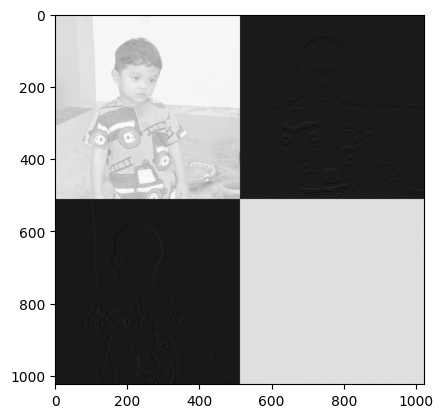

In [17]:
lvl1 = Display(A1, dH1, dV1, dD1)
plt.imshow(lvl1, cmap='gray')

Code di atas berfungsi memanggil fungsi Display1 untuk menyatukan 4 variabel citra A1, dH1, dV1 dan dD1 kemudian disimpan dalam variabel lvl1 dan ditampilkan dengan bantuan fungsi imshow pada matplotlib

Text(0.5, 1.0, 'HH')

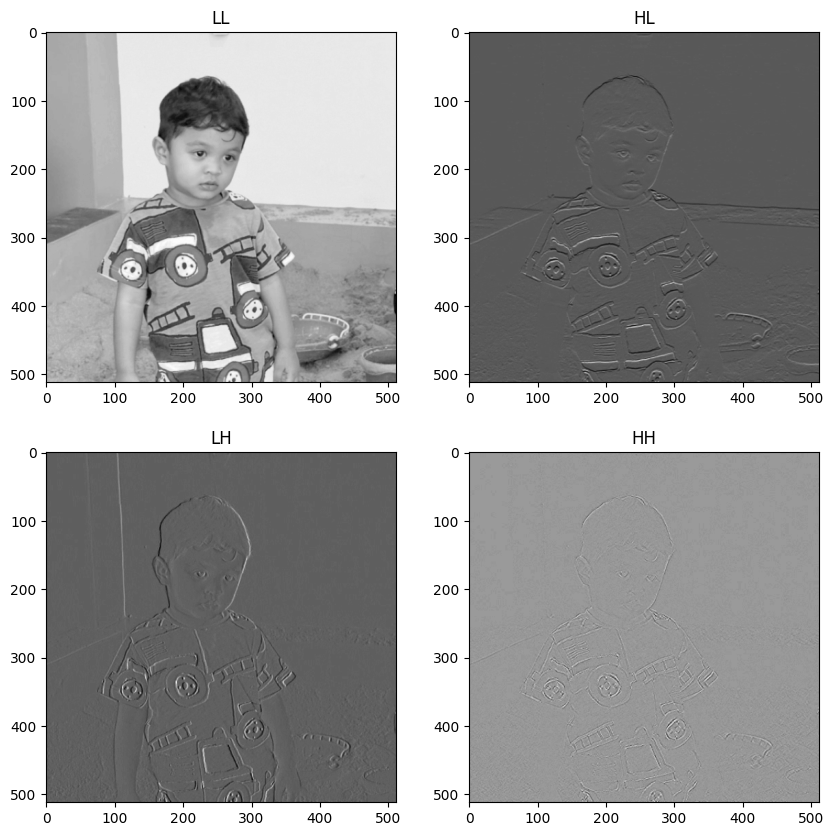

In [25]:
plt.figure(figsize=[10,10]) #merupakan method yang berfungsi memberi ukuran pada suatu dimensi

plt.subplot(2, 2, 1) 
plt.imshow(A1, cmap='gray') 
plt.title('LL')
plt.subplot(2, 2, 2) 
plt.imshow(dV1, cmap='gray') 
plt.title('HL')
plt.subplot(2, 2, 3) 
plt.imshow(dH1, cmap='gray') 
plt.title('LH')
plt.subplot(2, 2, 4) 
plt.imshow(dD1, cmap='gray') 
plt.title('HH')

Code di atas digunakan untuk menampilkan citra hasil dekomposisi dengan menampilkan keempat bagian yaitu LL, LH, HL, HH.

Soal Nomor 3

Lakukan Dekomposisi Wavelet Level 2 pada hasil dekomposisi level 1 menggunakan kernel x dan tampilkan citra seperti gambar berikut:

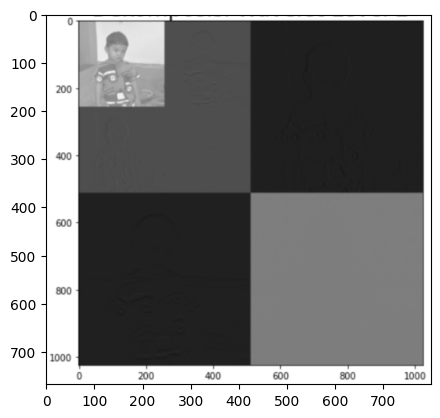

In [19]:
image_C = plt.imread("Contoh_DL2.png")
plt.imshow(image_C, cmap="gray")

Code di atas digunakan untuk membaca sekaligus menampilkan citra "Contoh_DL2.png" sebagai contoh hasil wavelet level 2

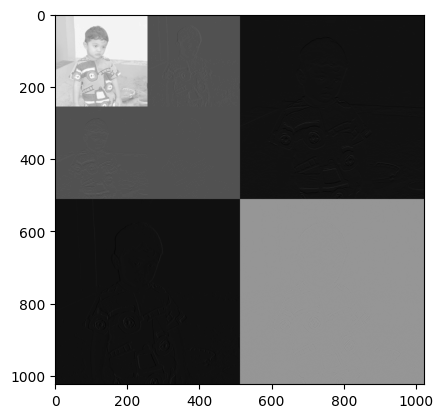

In [20]:
A2  = dekomposisi(A1, low_pass_filter, low_pass_filter)
dH2 = dekomposisi(A1, low_pass_filter, high_pass_filter)
dV2 = dekomposisi(A1, high_pass_filter, low_pass_filter)
dD2 = dekomposisi(A1, high_pass_filter, high_pass_filter)

lvl2 = Display(A2, dH2, dV2, dD2)
lvl2 = Display(lvl2, dH1, dV1, dD1)
plt.imshow(lvl2, cmap='gray')

Code di atas digunakan untuk memanggil fungsi dekomposisi yang akan dimasukkan valuenya ke dalam variabel yang ada di atas.

Lalu ditampilkan menggunakan fungsi .imshow().